# EDA for Movie Rec

## 0. 데이터 불러오기
- tsv 파일은 `sep='\t'` 로 데이터프레임 생성

In [3]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# train data path 지정
data_path = '../data/train'

### 📁 train_ratings.csv
- row 개수 : 5154471
- 결측치 : 없음
    <br><br>
- `user` (int)
    - nunique: 31360
    <br><br>
- `item` (int)
    - nunique: 6807
    <br><br>
- `time` (int)
    - nunique: 5074973
    - row 개수보다 적음 -> 동일한 time도 존재
    <br><br>

In [5]:
df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))

In [6]:
df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [8]:
df.nunique()

user      31360
item       6807
time    5074973
dtype: int64

In [9]:
df.isna().sum()

user    0
item    0
time    0
dtype: int64

In [10]:
# sparse ratio 확인
num_train_users = df['user'].nunique()
num_train_items = df['item'].nunique()
print("Data sparsity ratio: ", 1 - len(df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


In [11]:
titles = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
writers = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
genres = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
directors = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')
years = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')

### 📁 titles.tsv
- row 개수 : 6807
- 결측치 : 없음
    <br><br>
- `item` (int)
    - nunique: 6807
    <br><br>
- `title` (object(str))
    - nunique: 6806
    - 다른 item 이지만, 동일한 title도 존재
    <br><br>

In [12]:
titles.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [13]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


In [14]:
titles.nunique()

item     6807
title    6806
dtype: int64

In [15]:
titles.isna().sum()

item     0
title    0
dtype: int64

### 📁 writers.tsv
- row 개수 : 11306
- 결측치 : 없음
    <br><br>
- `item` (int)
    - nunique: 5648
    - row 개수가 더 많음, 한 item에 여러 writer 존재
    <br><br>
- `writer` (object(str))
    - nunique: 2989
    - 다른 item 이지만, 동일한 writer 존재

In [16]:
writers.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [17]:
writers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [18]:
writers.nunique()

item      5648
writer    2989
dtype: int64

In [19]:
writers.isna().sum()

item      0
writer    0
dtype: int64

In [20]:
# writer 정보는 항상 nm 으로 시작
writers['writer'].apply(lambda x: x[:2]).unique()

array(['nm'], dtype=object)

In [21]:
# 작가가 쓴 작품의 개수
writers['writer'].value_counts()

nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0414893     2
nm0414448     2
nm0414117     2
nm0414047     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [22]:
# 한 영화의 작가가 여러명 일 수 있음 
writers['item'].value_counts()

1907     24
783      23
364      21
2687     21
48322    19
         ..
79073     1
176       1
2560      1
42007     1
1237      1
Name: item, Length: 5648, dtype: int64

In [23]:
writers[writers['item'] == 1907]['writer'].nunique()

24

### 📁 genres.tsv
- row 개수 : 15933
- 결측치 : 없음
    <br><br>
- `item` (int)
    - nunique: 6807
    - 하나의 item이 여러 genre를 가지기도 함 
    <br><br>
- `title` (object(str))
    - nunique: 18
    <br><br>

In [24]:
genres.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [25]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [26]:
genres.nunique()

item     6807
genre      18
dtype: int64

In [27]:
genres.isna().sum()

item     0
genre    0
dtype: int64

In [28]:
# 한 영화가 여러 개의 장르를 가질 수 있음 (4247)
sum(genres['item'].value_counts() >= 2)

5051

In [29]:
sns.set_palette("Paired")

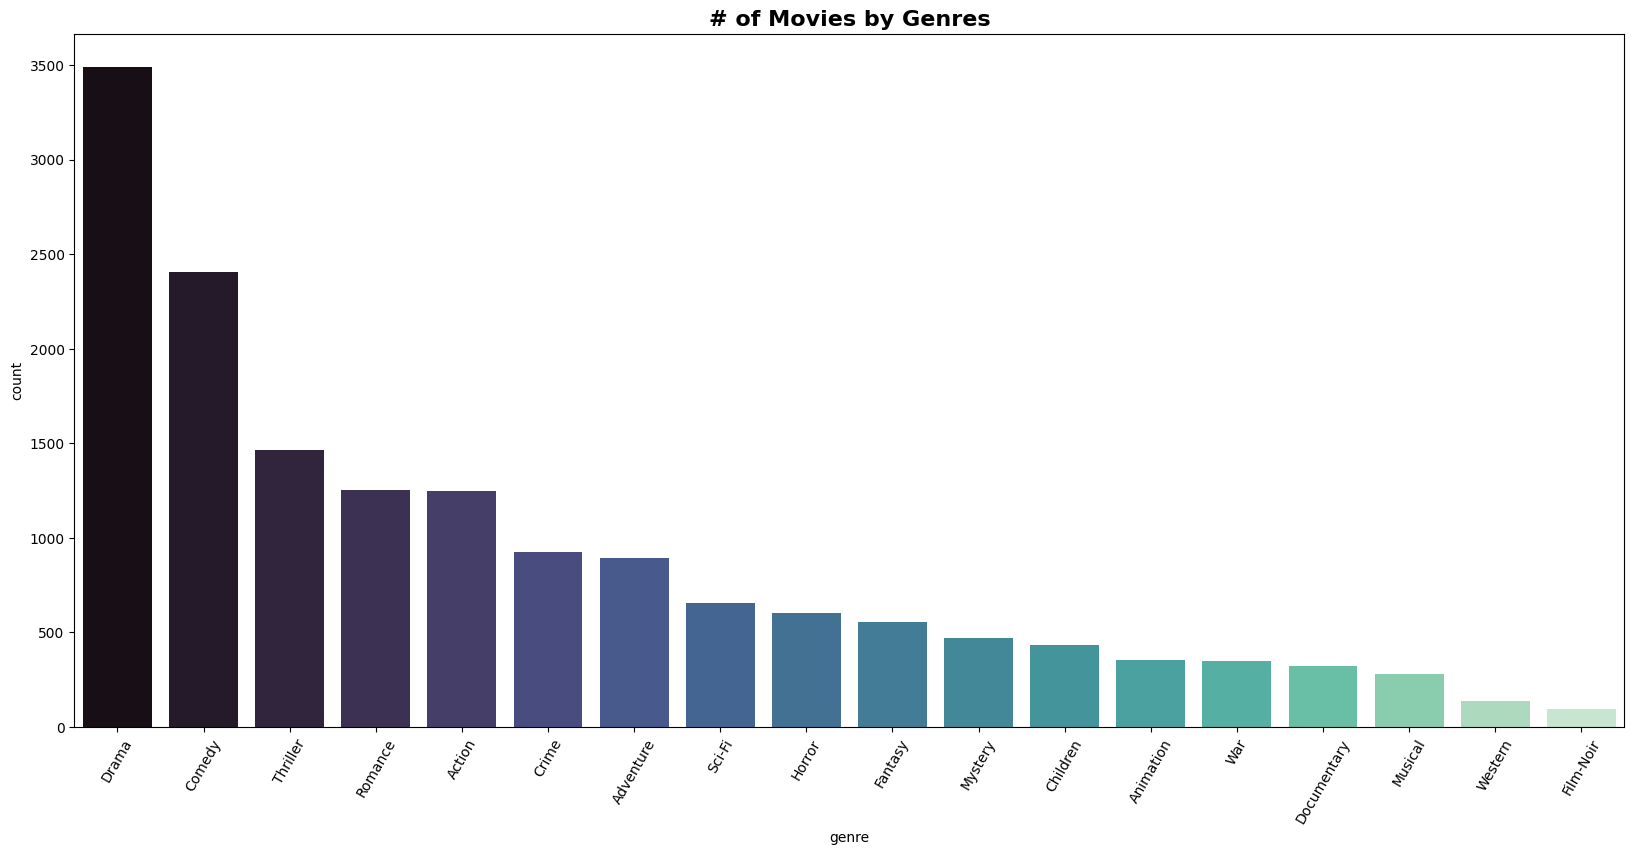

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20,9))
# data = genres['genre'].value_counts().sort_values(ascending=Tre)
sns.countplot(data=genres, x='genre', order=genres['genre'].value_counts().index ,palette='mako')
plt.title('# of Movies by Genres', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

In [31]:
# genres.loc(genres['item'].value_counts() >= 2, ['item']).nunique()

### 📁 directors.tsv
- row 개수 : 6807
- 결측치 : 없음
    <br><br>
- `item` (int)
    - nunique: 6807
    <br><br>
- `title` (object(str))
    - nunique: 6806
    - `nm` 으로 시작
    <br><br>

In [32]:
directors.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [33]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [34]:
directors.nunique()

item        5503
director    1340
dtype: int64

In [35]:
directors.isna().sum()

item        0
director    0
dtype: int64

In [36]:
# 감독 nm 으로 시작
directors['director'].apply(lambda x: x[:2]).unique()

array(['nm'], dtype=object)

### 📁 years.tsv
- row 개수 : 6799
- 결측치 : 없음
    <br><br>
- `item` (int)
    - nunique: 6799
    <br><br>
- `year` (int)
    - nunique: 93
    - 다른 item 이지만, 동일한 year 존재
    <br><br>

In [37]:
years.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [38]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [39]:
years.nunique()

item    6799
year      93
dtype: int64

In [40]:
years.isna().sum()

item    0
year    0
dtype: int64

In [41]:
years['year'].min()

1922

In [42]:
years['year'].max()

2014

✅ 분포 확인 결과 negative skew (오른쪽으로 치우쳐짐)
- 처리: `y' = -y - min(-y) + c` 후 로그 변환

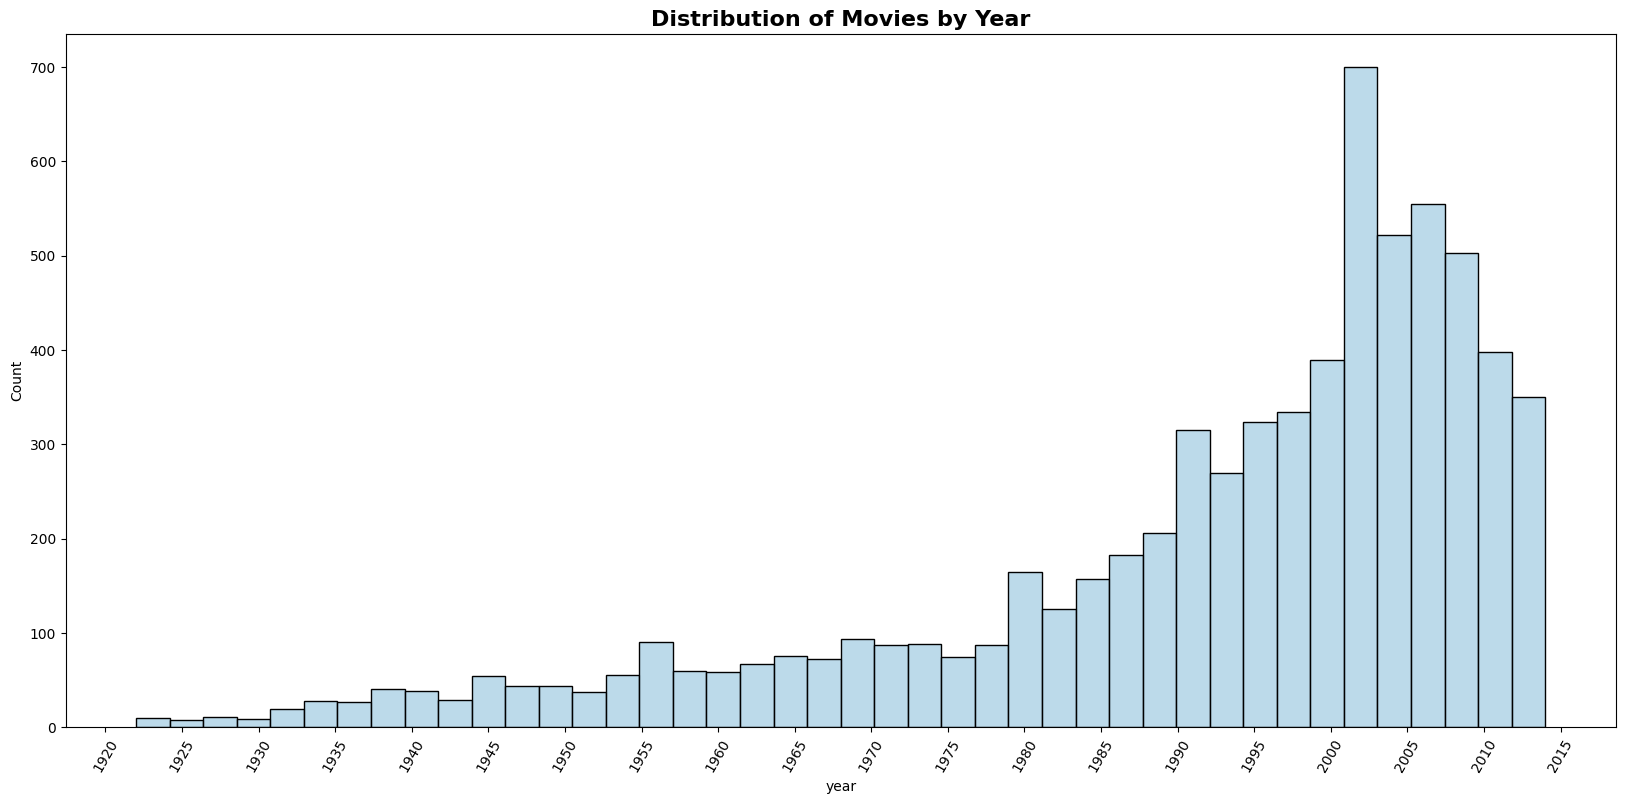

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(20,9))
sns.histplot(data=years, x='year', )
plt.title('Distribution of Movies by Year', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(np.arange(1920, 2020, 5), rotation=60)
plt.show()

In [44]:
years['year'].describe()

count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

## 1. 데이터 시각화
- interaction 정보가 없는 df: ~~~s (ex. `directors`, `genres`, ...)
- interaction 정보를 포함한 df: ~~~_df (ex. `director_df`, `genre_df`, ...)

- `active_user_ids`: 가장 영화를 많이 본 유저 10명의 id
-  `popular_movie_ids`: 사람들이 가장 많이 본 영화 10개 id

In [45]:
active_user_ids = df.value_counts('user').index[:10]
popular_movie_ids = df.value_counts('item').index[:10]

print(f'active user ids: {active_user_ids}')
print(f'popular movie ids: {popular_movie_ids}')

active user ids: Int64Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122,
            118754],
           dtype='int64', name='user')
popular movie ids: Int64Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


In [46]:
# director_df : director 정보가 user-item interaction에 합쳐진 df
director_df = pd.merge(df, directors, on=['item'])
# director_id : interaction 에서 가장 많이 등장한 director 10명의 id
director_id = director_df.value_counts('director').index[:10]

# 10명을 순회하며
side_df = []
for director in director_id:
    side_df.append(director_df.loc[director_df['director'] == director])

director_top = pd.concat(side_df)

In [47]:
director_top.head()

,user,item,time,director
341943,11,1544,1230787983,nm0000229
341944,58,1544,1144059266,nm0000229
341945,421,1544,1192346253,nm0000229
341946,422,1544,1193457306,nm0000229
341947,436,1544,1114555837,nm0000229


In [48]:
print(f"=== Number of all unique director ids \n{director_df['director'].nunique()}\n")
print(f"=== Top 10 director ids \n{director_id}\n")
print(f"=== Sample of top 10 user-director data \n{director_top.sample(10)}\n")
print(f"=== Shape of the data: {director_top.shape}")

=== Number of all unique director ids 
1340

=== Top 10 director ids 
Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')

=== Sample of top 10 user-director data 
           user   item        time   director
5026214   34187   1343  1193712526  nm0000217
505423    46063   5445  1217111035  nm0000229
183092    59407   1270  1216483182  nm0000709
396656   136101  34048  1274009665  nm0000229
1153037   44825   1291  1191011815  nm0000229
734626   124213   6874  1185239194  nm0000233
1504877   95190  48516  1340575191  nm0000217
1851088   95956   4022  1221932603  nm0000709
945556    63630    296  1225291545  nm0000233
1172007  121661   3578  1244858516  nm0000631

=== Shape of the data: (672019, 4)


### 🤔 영화를 많이 제작한 감독의 작품을 유저가 많이 볼까?
- 모양은 비슷해 보여도, 순위는 전혀 상관 없는 것을 확인함

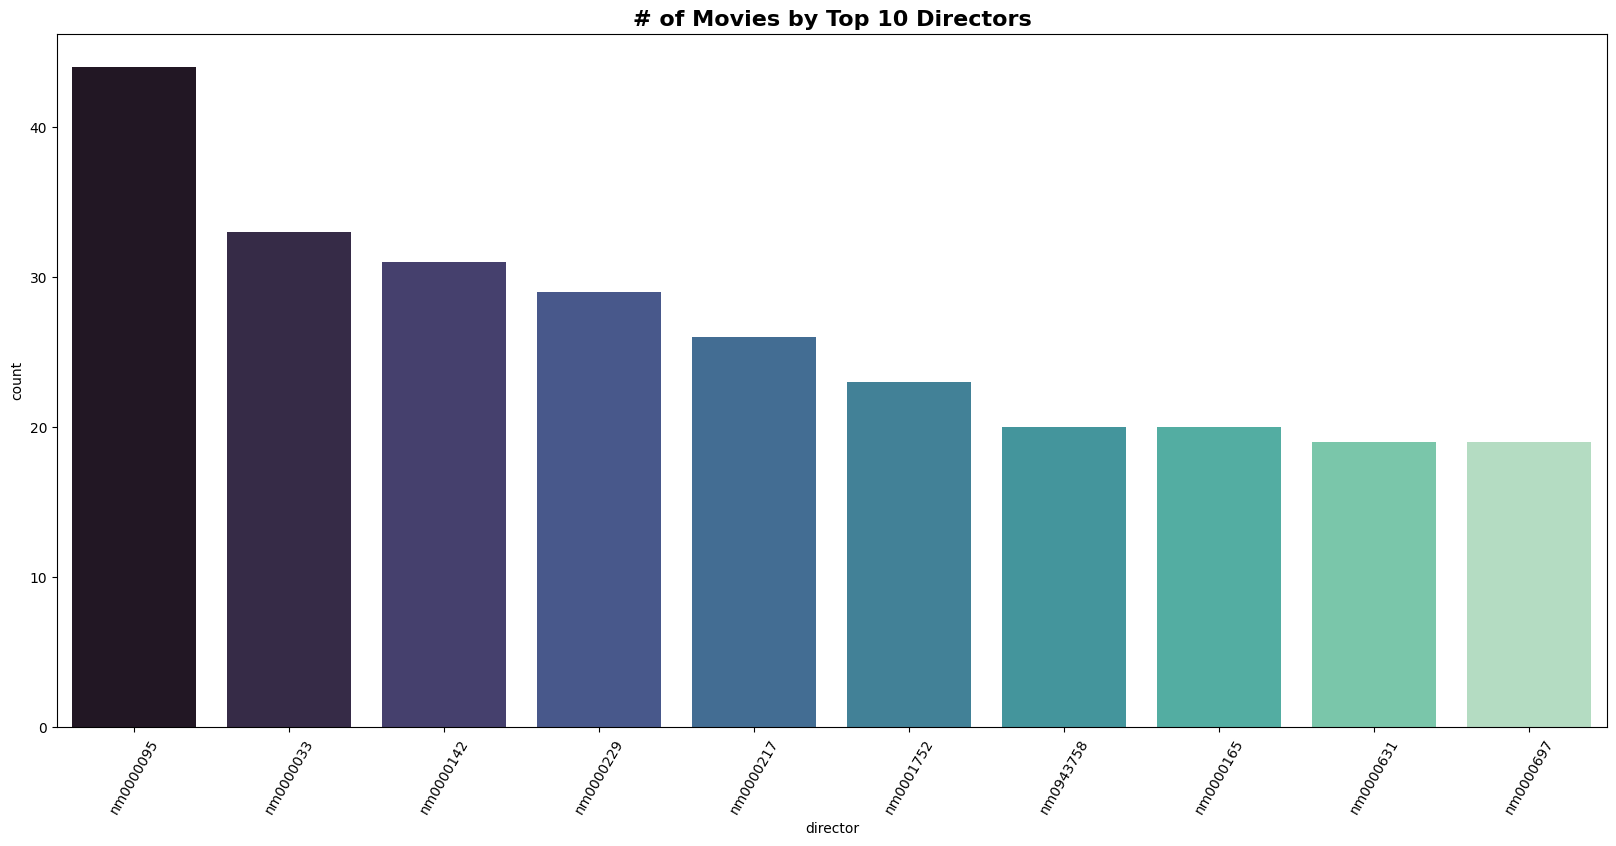

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(20,9))
sns.countplot(data=directors, x='director', 
              order=directors['director'].value_counts().index[:10],
              palette='mako')
plt.title('# of Movies by Top 10 Directors', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

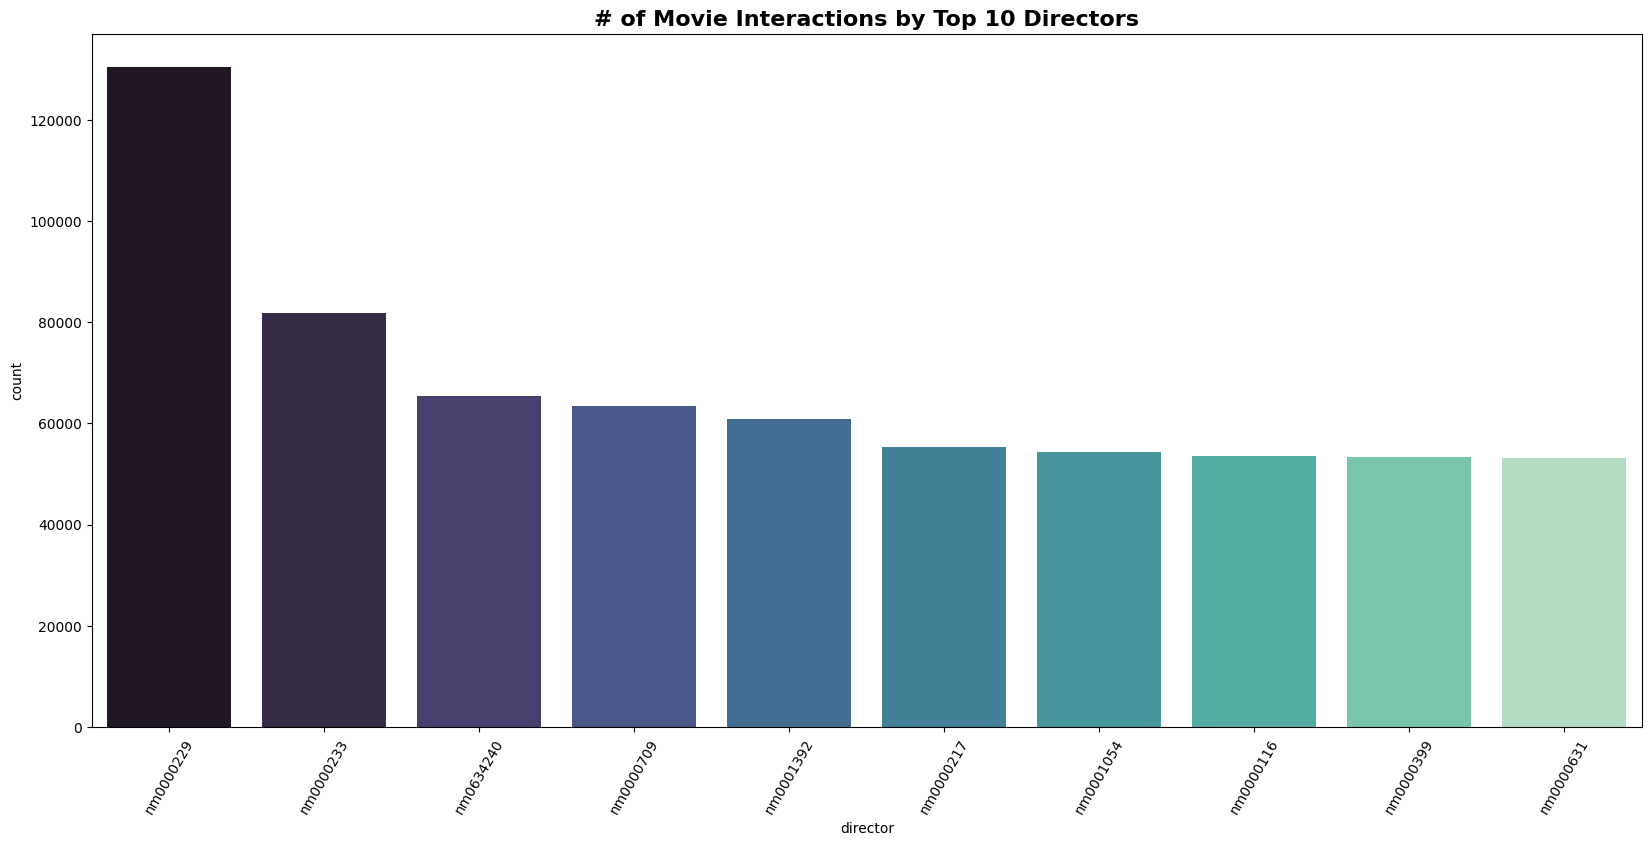

In [50]:
# item-director 정보 시각화 
fig, ax = plt.subplots(1, 1, figsize=(20,9))
sns.countplot(data=director_top, x='director',
              order=director_top['director'].value_counts().index[:10],
              palette='mako')
plt.title('# of Movie Interactions by Top 10 Directors', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

In [51]:
director_id

Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')

### 🤔 유저가 많이 본 작품의 감독은 몇 개의 영화를 제작했을까?
- 모양은 비슷해 보여도, 순위는 전혀 상관 없는 것을 확인함
- 가장 많이 본 영화 감독 10명 기준으로 봐보자
- 가장 많이 본 영화 감독 10명 + 다작한 감독 10명으로 봐보자

In [52]:
directors[directors['director'].isin(director_id)]['director'].value_counts()

nm0000229    29
nm0000217    26
nm0000631    19
nm0001054    17
nm0000709    15
nm0001392    14
nm0000233    11
nm0000399    10
nm0634240     9
nm0000116     7
Name: director, dtype: int64

In [53]:
director_top['director'].value_counts().index[:10]

Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object')

In [54]:
directors[directors['director'].isin(director_id)]['director'].value_counts()

nm0000229    29
nm0000217    26
nm0000631    19
nm0001054    17
nm0000709    15
nm0001392    14
nm0000233    11
nm0000399    10
nm0634240     9
nm0000116     7
Name: director, dtype: int64

In [55]:
directors['director'].value_counts()

nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [56]:
interaction_idx = director_top['director'].value_counts().index[:10]
directors_idx = directors['director'].value_counts().index[:10]
x = interaction_idx.append(directors_idx)
x

Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631',
       'nm0000095', 'nm0000033', 'nm0000142', 'nm0000229', 'nm0000217',
       'nm0001752', 'nm0943758', 'nm0000165', 'nm0000631', 'nm0000697'],
      dtype='object')

In [57]:
# interaction top 10, director top 10
interaction_idx = director_top['director'].value_counts().index[:10] # interaction
directors_idx = directors['director'].value_counts().index[:10] # directors
x = interaction_idx.append(directors_idx)

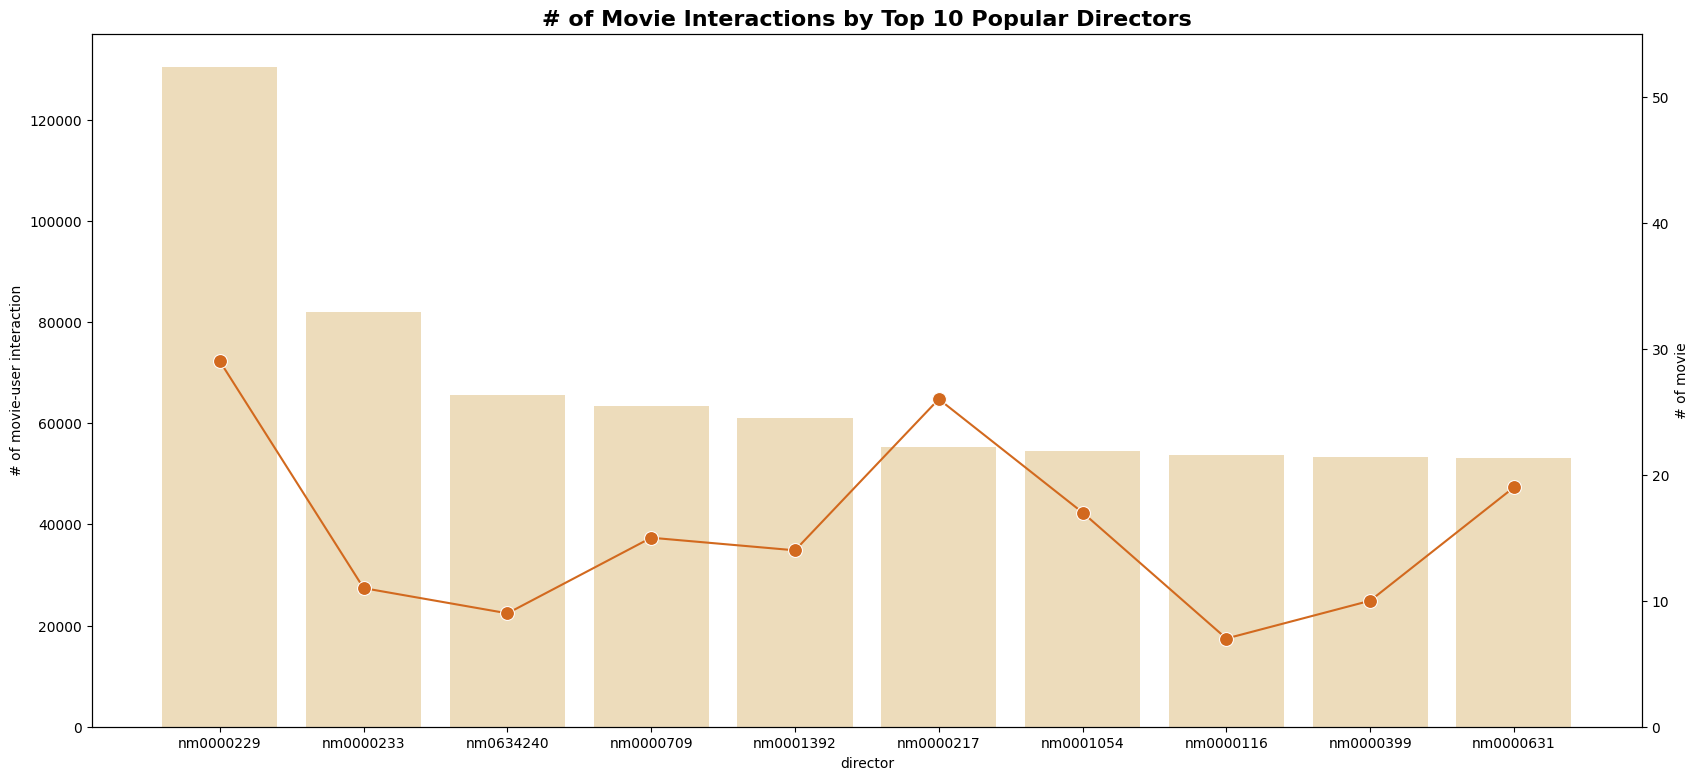

In [58]:
# item-director 정보 시각화 
fig, ax = plt.subplots(1, 1, figsize=(20,9))
ax_ = ax.twinx()
x = director_top['director'].value_counts().index[:10]

sns.countplot(data=director_top, x='director',
              order=x,
              color='wheat', ax=ax)

director_counts = directors[directors['director'].isin(director_id)]['director'].value_counts()
sns.lineplot(x=x, y=director_counts.loc[x].values, 
             color='chocolate',
             marker='o',
             markersize=10,
             ax=ax_)

ax.set_ylabel('# of movie-user interaction')
ax_.set_ylabel('# of movie')
ax_.set_ylim(0, 55)
plt.title('# of Movie Interactions by Top 10 Popular Directors', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

In [59]:
interaction_counts = director_df[director_df['director'].isin(x)]['director'].value_counts()
interaction_counts
x
director_df[director_df['director'].isin(x)]['director']

84950      nm0000631
84951      nm0000631
84952      nm0000631
84953      nm0000631
84954      nm0000631
             ...    
5397789    nm0000709
5397790    nm0000709
5397791    nm0000709
5397792    nm0000709
5397793    nm0000709
Name: director, Length: 672019, dtype: object

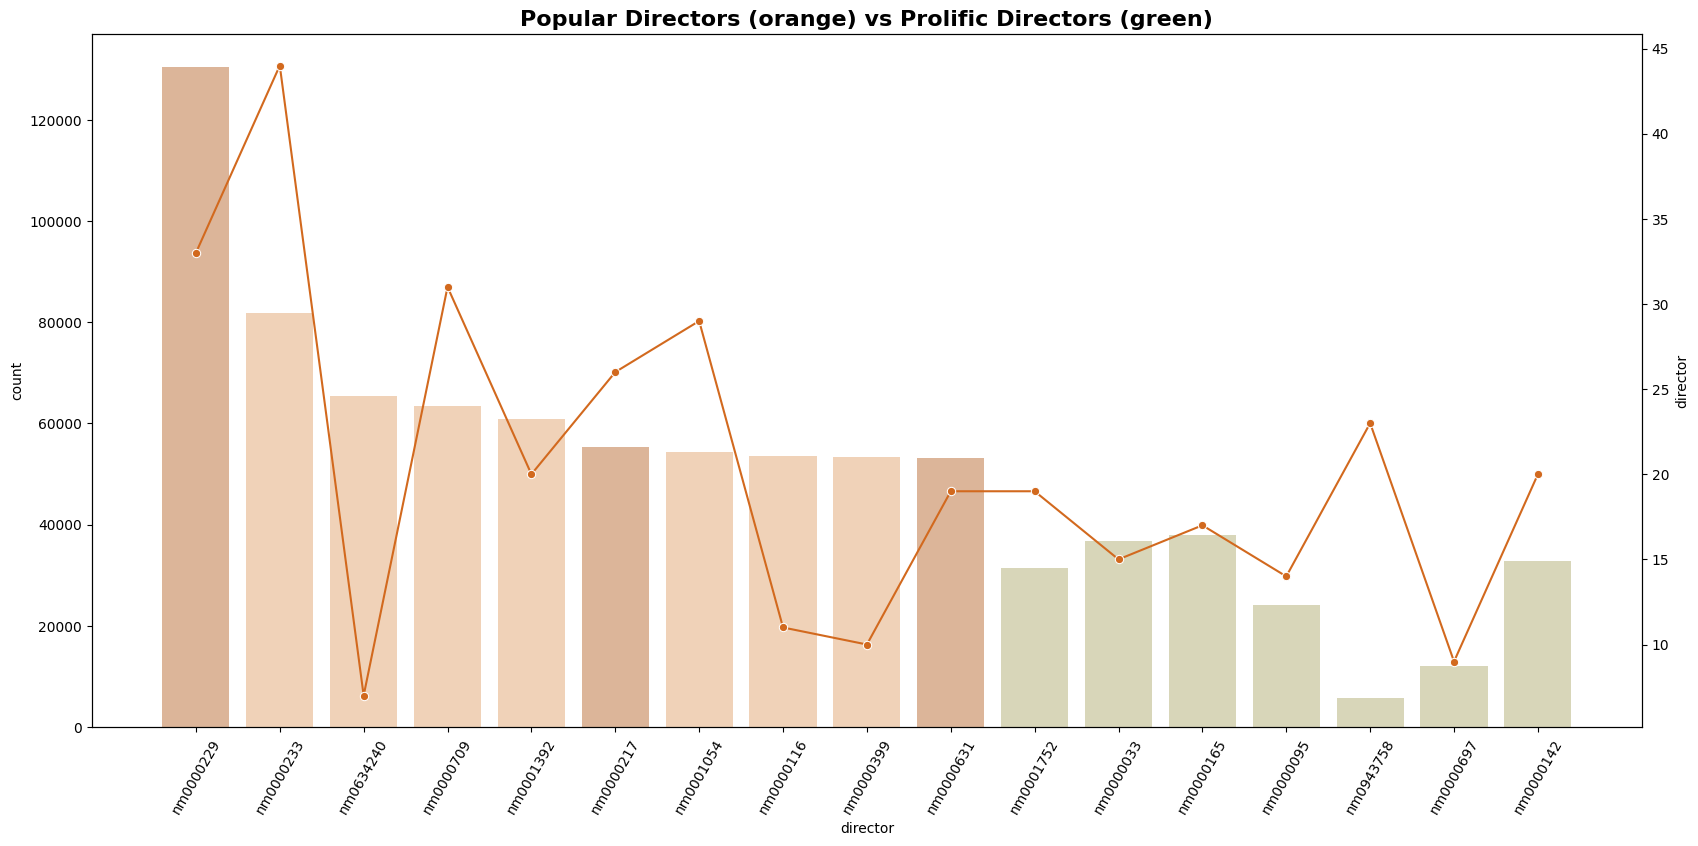

In [60]:
# 인터랙션 정보가 가장 많은 top 10 director 추출
top_directors_interaction = director_df['director'].value_counts()[:10]

# 아이템 director 정보가 가장 많은 top 10 director 추출
top_directors_item = directors['director'].value_counts()[:10]

# 중복 제거 및 정렬된 x 값 생성
x_values = sorted(set(top_directors_interaction.index) | set(top_directors_item.index), 
                  key=lambda x: top_directors_interaction.get(x, 0), reverse=True)
# x_values = top_directors_interaction + top_directors_item

fig, ax = plt.subplots(figsize=(20, 9))
# x 축 레이블 회전
plt.xticks(rotation=60)
ax2 = ax.twinx()

# 색깔 다르게 
colors = []
for x in x_values:
    if x in top_directors_interaction.index and x in top_directors_item.index:
        colors.append('chocolate')
    elif x in top_directors_interaction.index:
        colors.append('sandybrown')
    else:
        colors.append('darkkhaki')

# 인터랙션: countplot
sns.countplot(data=director_df[director_df['director'].isin(x_values)], 
              x='director', 
              order=x_values, 
              palette=colors, alpha=0.5,
              ax=ax)

# 영화 정보: lineplot
director_counts = directors[directors['director'].isin(x_values)]['director'].value_counts().sort_index()
sns.lineplot(x=x_values, 
             y=director_counts, 
             color='chocolate', 
             marker='o',
             ax=ax2)

plt.title('Popular Directors (orange) vs Prolific Directors (green)', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})

plt.show()

In [61]:
# 인터랙션 정보가 가장 많은 top 10 director 추출
top_directors_interaction = director_df['director'].value_counts()[:10]

# 아이템 director 정보가 가장 많은 top 10 director 추출
top_directors_item = directors['director'].value_counts()[:10]

# 중복 제거 및 정렬된 x 값 생성
x_values = top_directors_interaction + top_directors_item
x_values.index

Index(['nm0000033', 'nm0000095', 'nm0000116', 'nm0000142', 'nm0000165',
       'nm0000217', 'nm0000229', 'nm0000233', 'nm0000399', 'nm0000631',
       'nm0000697', 'nm0000709', 'nm0001054', 'nm0001392', 'nm0001752',
       'nm0634240', 'nm0943758'],
      dtype='object')

In [62]:
# 인터랙션 정보가 가장 많은 top 10 director 추출
top_directors_interaction = director_df['director'].value_counts()[:10].index

# 아이템 director 정보가 가장 많은 top 10 director 추출
top_directors_item = directors['director'].value_counts()[:10].index
# top_directors_item = director_df.loc[top_directors_item, 'director'].value_counts()

# 중복 제거 및 정렬된 x 값 생성
x_idx = top_directors_interaction.union(top_directors_item)
x_idx = director_df[director_df['director'].isin(x_values)]['director'].value_counts().index

In [63]:

director_df[director_df['director'].isin(x_idx)]['director'].value_counts()

Series([], Name: director, dtype: int64)

In [64]:
directors[directors['director'].isin(x_idx)]['director'].value_counts()

Series([], Name: director, dtype: int64)

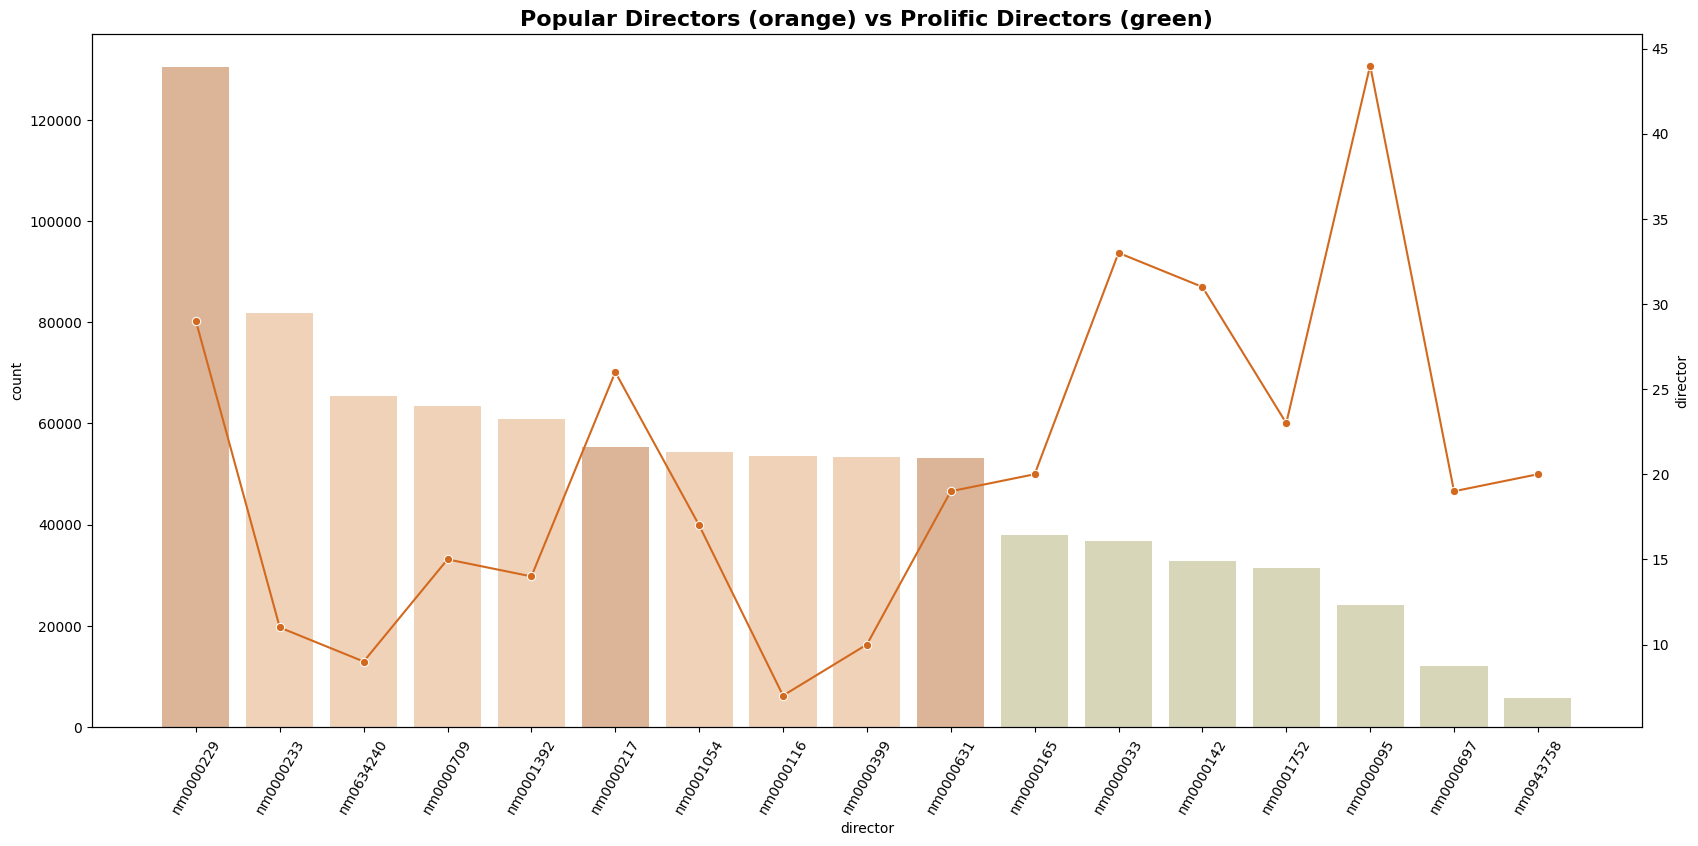

In [65]:
# 인터랙션 정보가 가장 많은 top 10 director 추출
top_directors_interaction = director_df['director'].value_counts()[:10].index

# 아이템 director 정보가 가장 많은 top 10 director 추출
top_directors_item = directors['director'].value_counts()[:10].index
# top_directors_item = director_df.loc[top_directors_item, 'director'].value_counts()

# 중복 제거 및 정렬된 x 값 생성
x_idx = top_directors_interaction.union(top_directors_item)
x_idx = director_df[director_df['director'].isin(x_idx)]['director'].value_counts().index

fig, ax = plt.subplots(figsize=(20, 9))
# x 축 레이블 회전
plt.xticks(rotation=60)
ax2 = ax.twinx()

# 색깔 다르게 
colors = []
for x in x_idx:
    if x in top_directors_interaction and x in top_directors_item:
        colors.append('chocolate')
    elif x in top_directors_interaction:
        colors.append('sandybrown')
    else:
        colors.append('darkkhaki')

# 인터랙션: countplot
sns.countplot(data=director_df[director_df['director'].isin(x_idx)], 
              x='director', 
              order=x_idx, 
              palette=colors, alpha=0.5,
              ax=ax)

# 영화 정보: lineplot
director_counts = directors[directors['director'].isin(x_idx)]['director'].value_counts()
sns.lineplot(x=x_idx, 
             y=director_counts.reindex(x_idx),
             color='chocolate', 
             marker='o',
             ax=ax2)

plt.title('Popular Directors (orange) vs Prolific Directors (green)', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})

plt.show()

### 🤔 유저는 비슷한 장르를 볼까?
- top user 기준으로 장르 분포 뽑아보자

In [66]:
genre_df = pd.merge(df, genres, on=['item'])
genre_df.head()

,user,item,time,genre
0,11,4643,1230782529,Action
1,11,4643,1230782529,Adventure
2,11,4643,1230782529,Drama
3,11,4643,1230782529,Sci-Fi
4,189,4643,1302945016,Action


In [67]:
# top_genre = genre_df['genre'].value_counts()[:20].index
# top_genre_df = genre_df[genre_df['genre'].isin(top_genre)]
# top_genre_df.nunique()

In [68]:
# x축: 유저
# y축: 장르
genre_df['user'].value_counts()[:20]

8405      6611
54465     5494
131894    4685
24219     4651
34576     4362
32514     4266
16938     4246
71975     4178
131904    4132
118754    4096
31122     4091
91349     4033
113806    3965
41283     3948
99754     3945
120575    3738
54107     3734
25978     3688
53998     3674
119048    3642
Name: user, dtype: int64

In [69]:
top_users = genre_df['user'].value_counts()[:100].index
top_users

Int64Index([  8405,  54465, 131894,  24219,  34576,  32514,  16938,  71975,
            131904, 118754,  31122,  91349, 113806,  41283,  99754, 120575,
             54107,  25978,  53998, 119048,  62040, 116189, 130767, 113081,
             89081,  26193, 122035,  79159, 110847,  87561,  92269,  47439,
            114270,  63834, 138325, 110190,  44492,  42886, 131275,  75810,
             14512, 103861,  15617,  99342,   2397, 131347, 123352, 100366,
             89402,  66533, 112762,  66049,  43209,  92499, 114412, 113073,
            116302,  52260,   3284,  61168,  32094, 104345, 130459, 117315,
            127138, 118848,  77018,  69378,  39214, 133811,  35834,  59407,
             42369,  32344,    775,  32671, 126072, 116498,  96684,  15585,
            104063,  13494,  55389,  58170,  49817, 122371, 102098,  39766,
             75299, 135015,  33575,  68063,  13955,  87283, 133329,  29310,
             19590,  24661,   3629,  32632],
           dtype='int64')

In [70]:
# genre_df.loc[genre_df['user'].isin(top_users), :].head()
top_users_genre_df = genre_df.loc[genre_df['user'].isin(top_users), :]
top_users_genre_df.head()

,user,item,time,genre
116,3629,4643,1157954773,Action
117,3629,4643,1157954773,Adventure
118,3629,4643,1157954773,Drama
119,3629,4643,1157954773,Sci-Fi
532,16938,4643,1180345049,Action


In [ ]:
top_users_genre_df.info()
top_users_genre_df['user'] = top_users_genre_df['user'].astype(str)

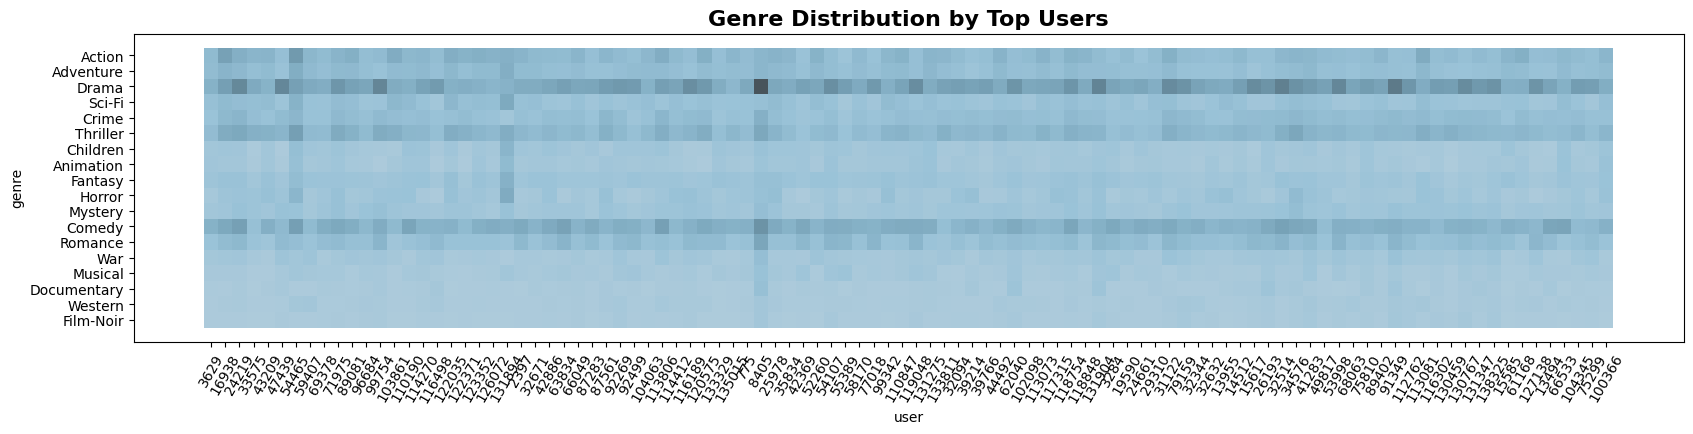

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))
sns.histplot(top_users_genre_df, x='user', y='genre')
plt.title('Genre Distribution by Top Users', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

In [ ]:
# 가장 interaction이 적은 유저 100명
end_users = genre_df['user'].value_counts()[-100:].index
end_users_genre_df = genre_df.loc[genre_df['user'].isin(end_users), :]
end_users_genre_df['user'] = end_users_genre_df['user'].astype(str)

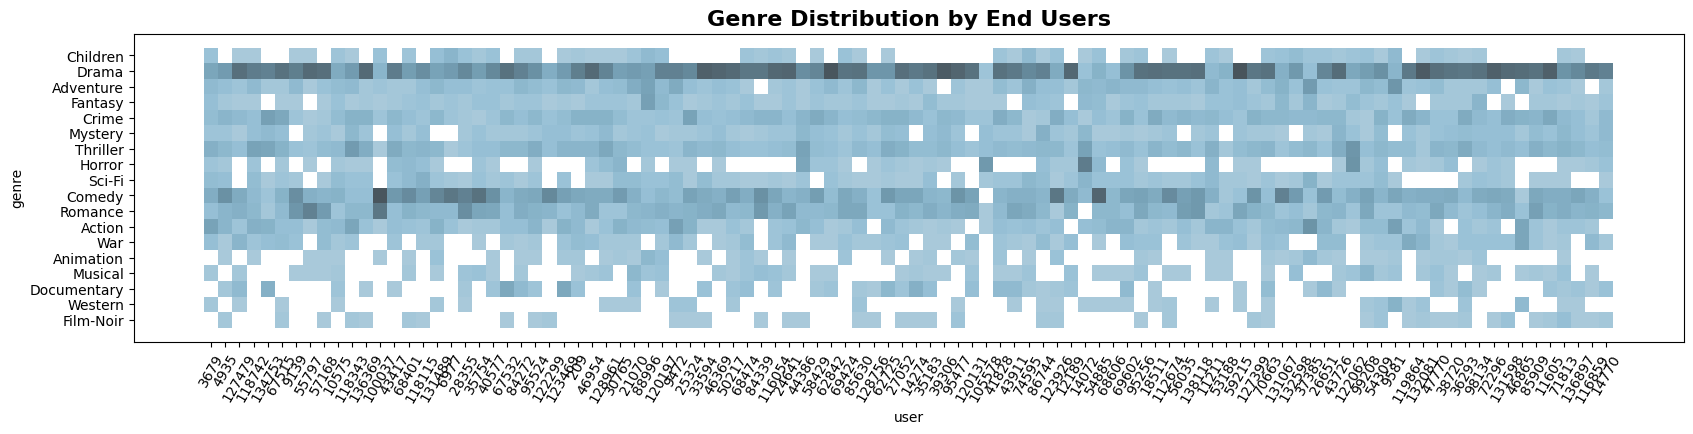

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(20,4))
sns.histplot(end_users_genre_df, x='user', y='genre')
plt.title('Genre Distribution by End Users', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

### 🤔 장르와 year 은 어떤 상관관계가 있을까?
- 일단은 interaction 정보를 포함한 df로 진행
- #TODO: interactio 정보를 포함하지 않은 df로도 진행해보기 -> 이게 둘 사이의 상관관계를 잘 나타낼 듯

- 시각화 편의를 위해 year -> binning 함

In [75]:
# 데이터 불러오기
years = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
years.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [76]:
# binning 라벨 (일단 대충..) 설정 후 cut
labels = np.array([i for i in range(20)])
years['bin_year'] = pd.cut(years['year'], bins=20, labels=labels)
years.head()

,item,year,bin_year
0,1348,1922,0
1,44587,1922,0
2,4768,1922,0
3,8235,1923,0
4,8609,1923,0


In [78]:
genre_year_df = pd.merge(genre_df, years, on=['item'])
genre_year_df.head()

,user,item,time,genre,year,bin_year
0,11,4643,1230782529,Action,2001,17
1,11,4643,1230782529,Adventure,2001,17
2,11,4643,1230782529,Drama,2001,17
3,11,4643,1230782529,Sci-Fi,2001,17
4,189,4643,1302945016,Action,2001,17


In [97]:
import warnings
warnings.filterwarnings('ignore')

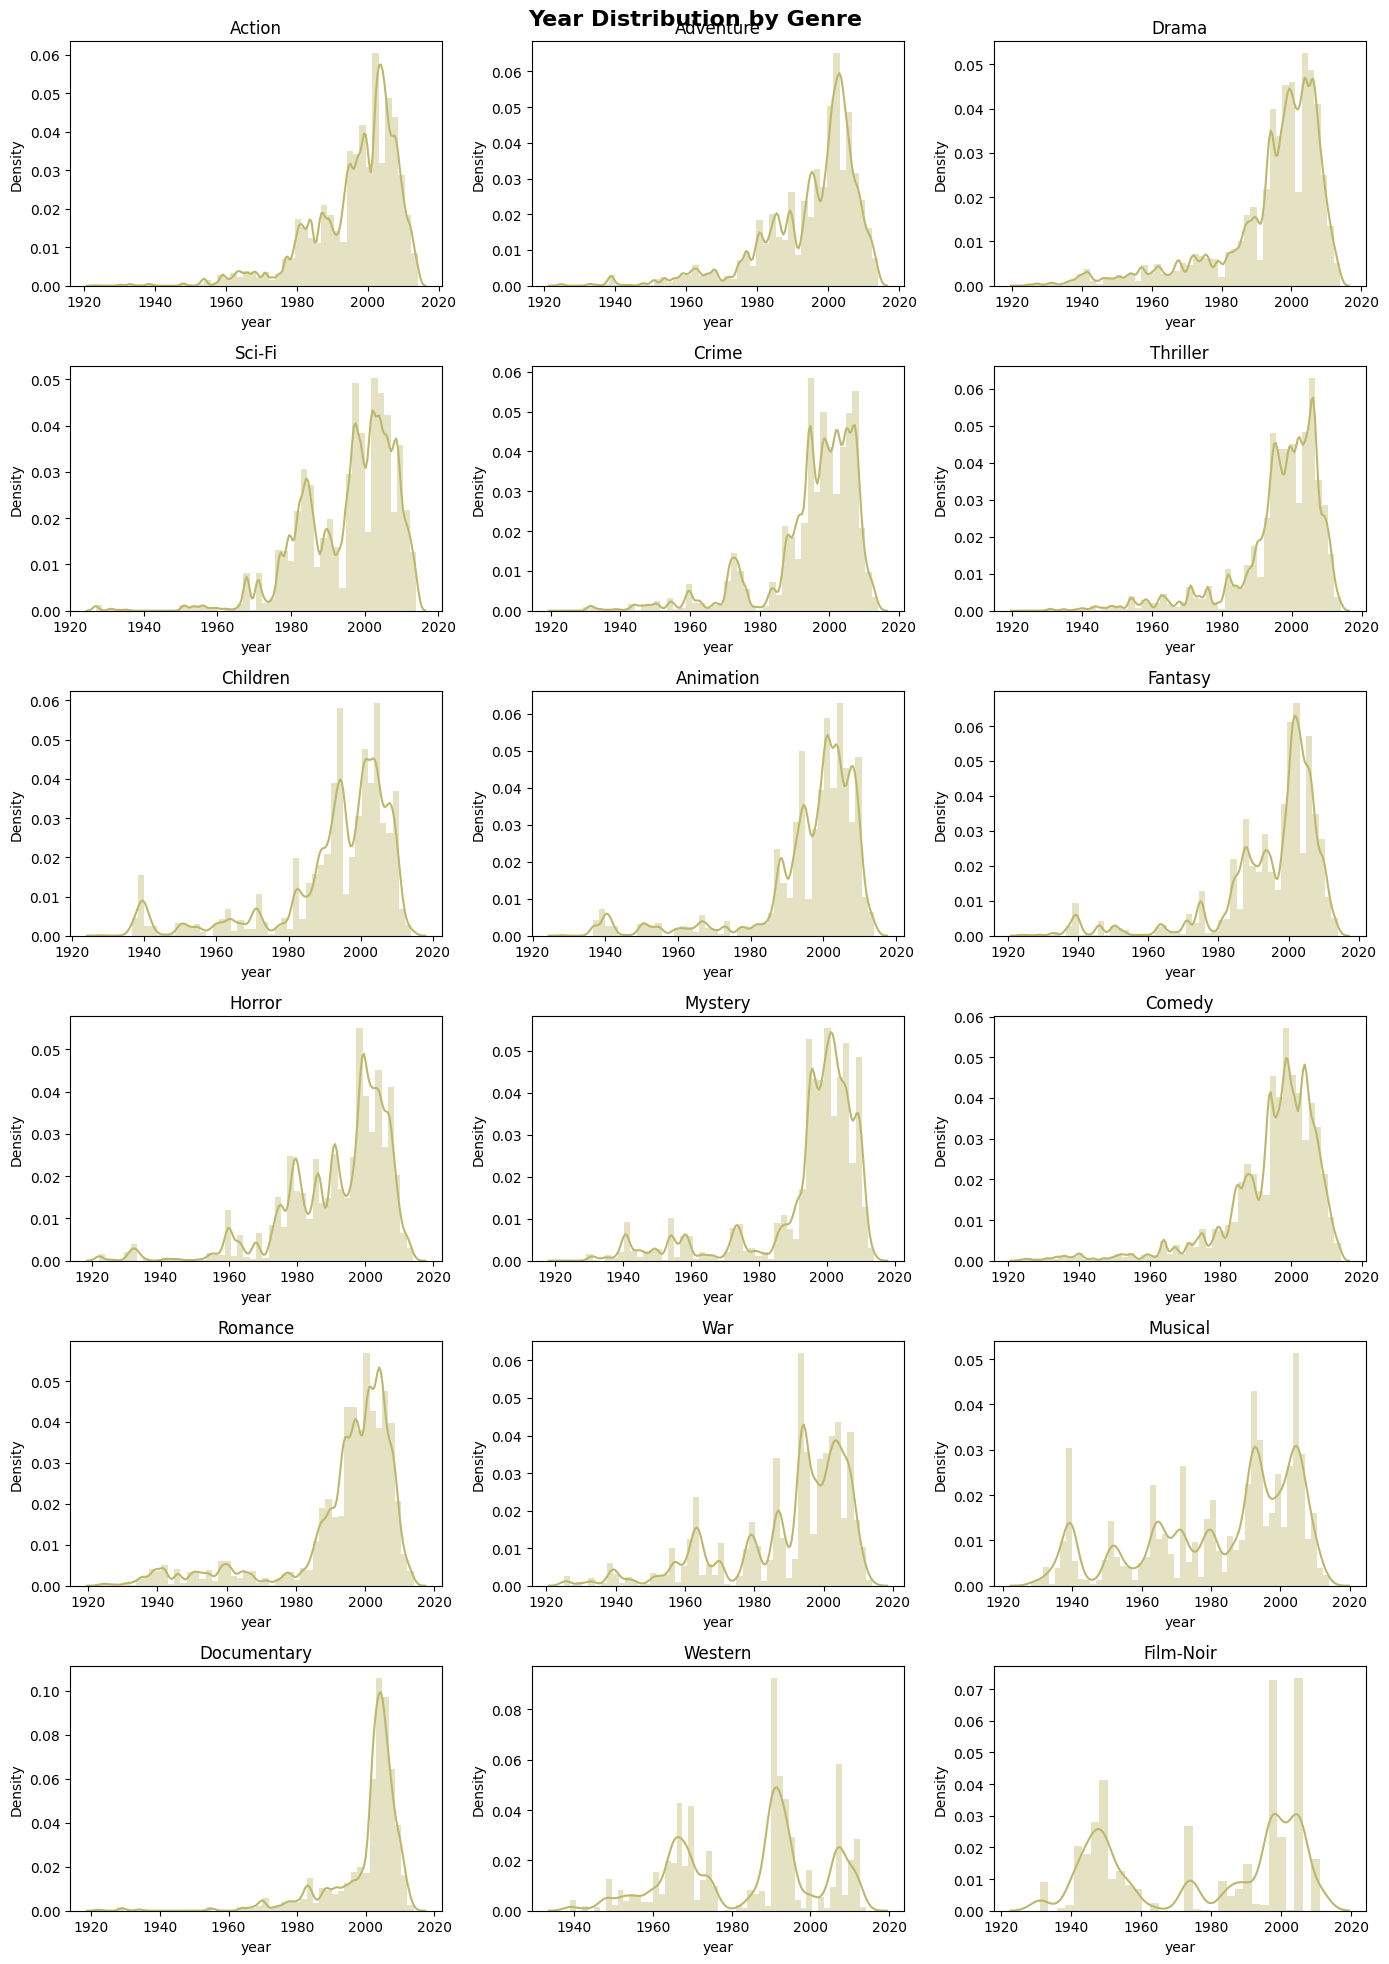

In [100]:
fig, ax = plt.subplots(6, 3, figsize=(14,20))

for i, genre in enumerate(genre_year_df['genre'].unique()):
    ax_ = ax[int(i/3), int(i%3)]
    sns.distplot(genre_year_df[genre_year_df['genre'] == genre]['year'],
                 ax=ax_,
                 color='darkkhaki')
    ax_.set_title(genre)

fig.suptitle('Year Distribution by Genre', fontsize=16, fontweight='bold') # position 추가
fig.tight_layout()
plt.show()


In [96]:
# TODO: interaction 없는 데이터로도 똑같이 반복해보자

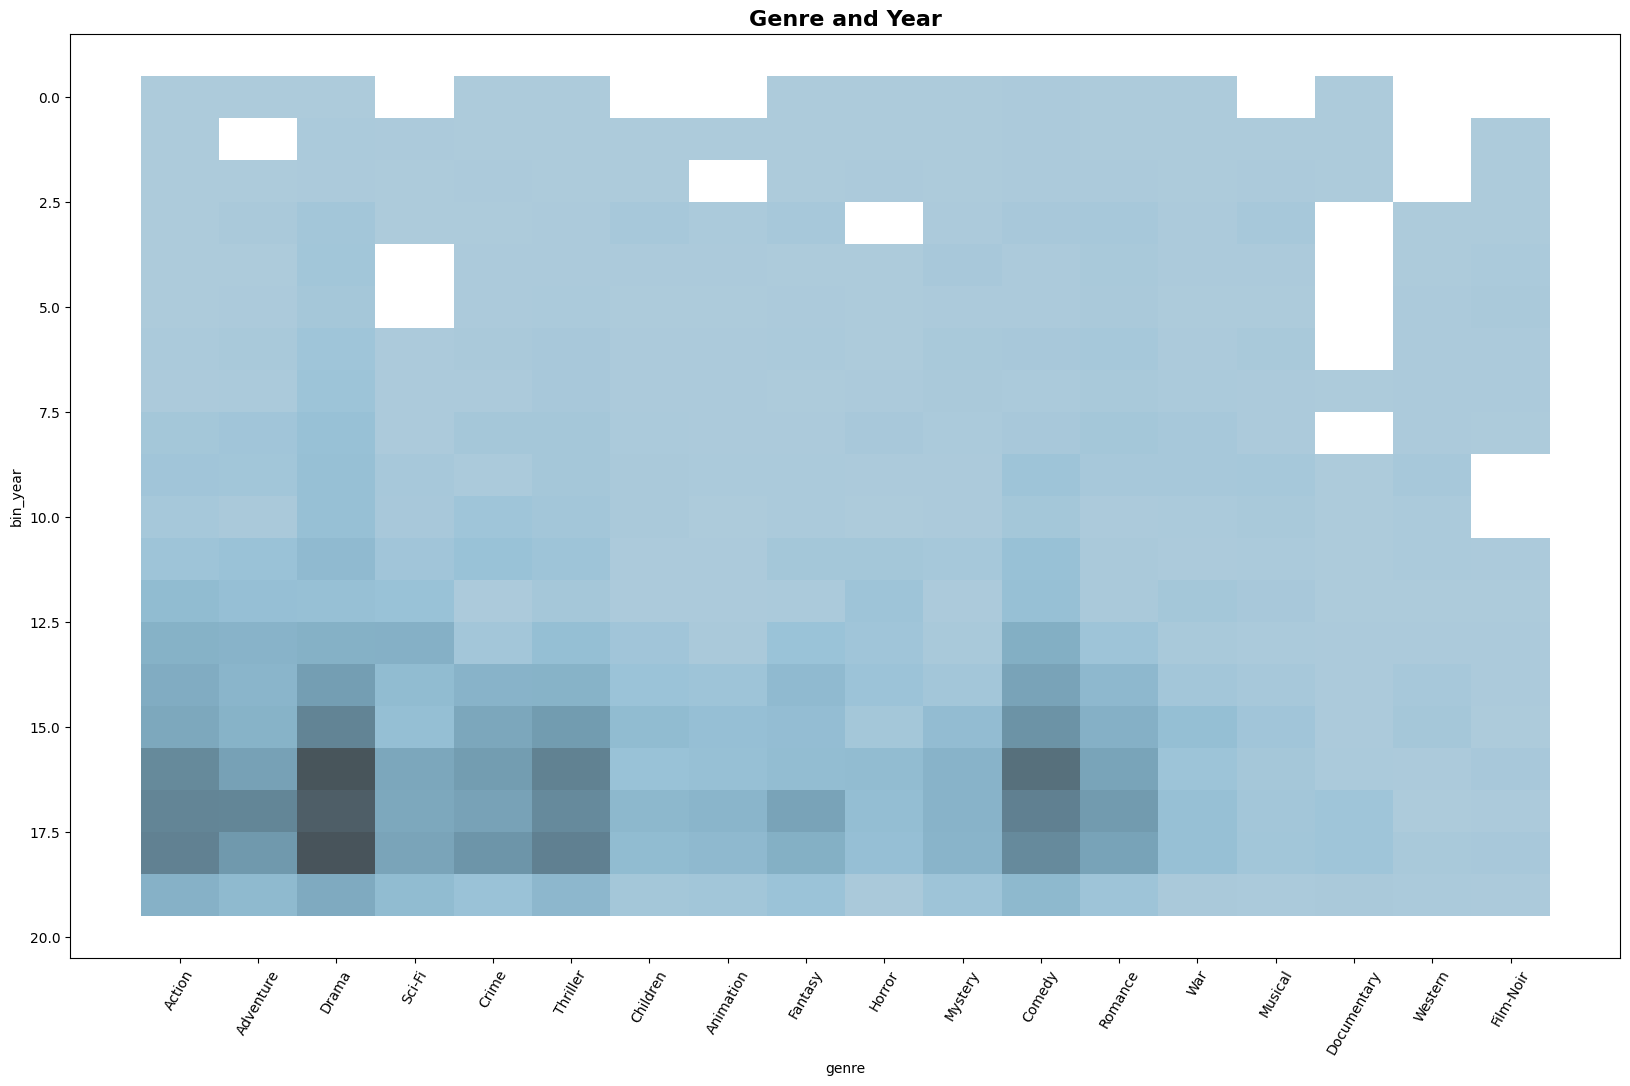

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))
sns.histplot(genre_year_df, x='genre', y='bin_year')
plt.title('Genre and Year', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

# ❌ 밑 부분은 수정 필요
- 변수 바꾸고 등등 여러 일이 있었음
- top_users_genre_year_df 이런 것도 정의 사라진 상태
- 인사이트 제공 못하는 시각화 작업이었음

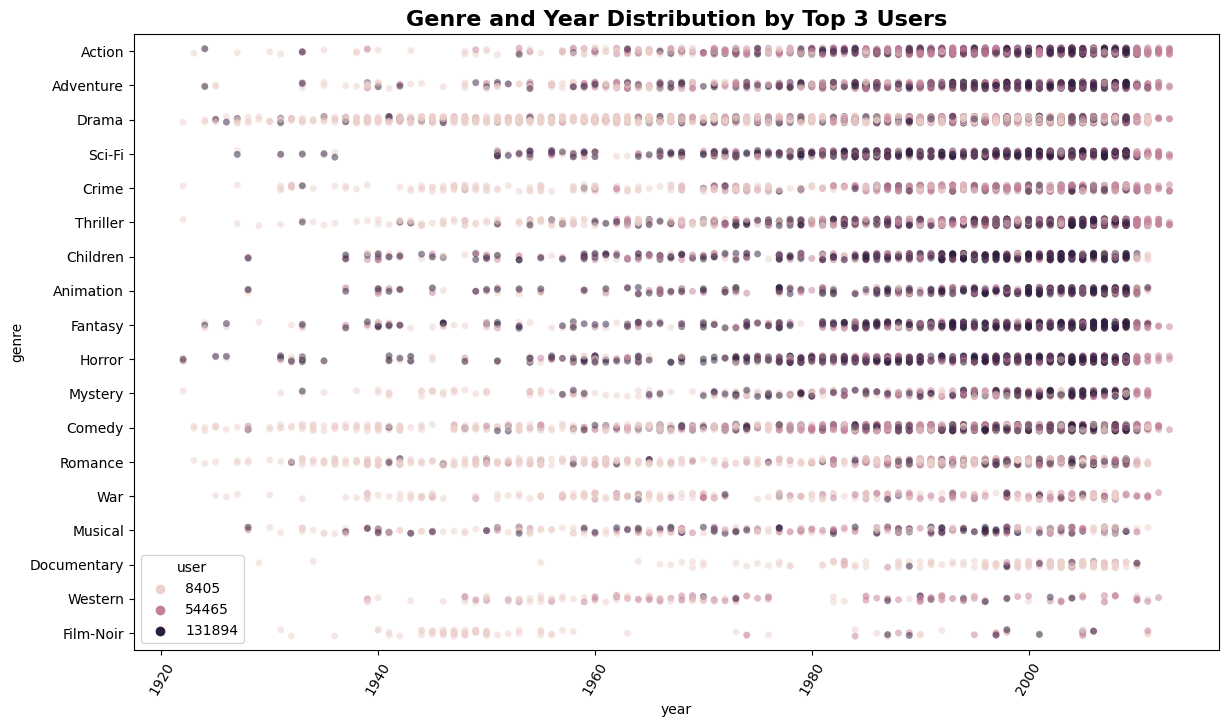

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sns.stripplot(top_users_genre_year_df, y='genre', x='year', alpha=0.5, hue='user')
plt.title('Genre and Year Distribution by Top 3 Users', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.xticks(rotation=60)
plt.show()

In [174]:
top_genre = top_users_genre_year_df['genre'].value_counts()[:5].index
top_users_genre_year_df = top_users_genre_year_df.loc[top_users_genre_year_df['genre'].isin(top_genre), :]

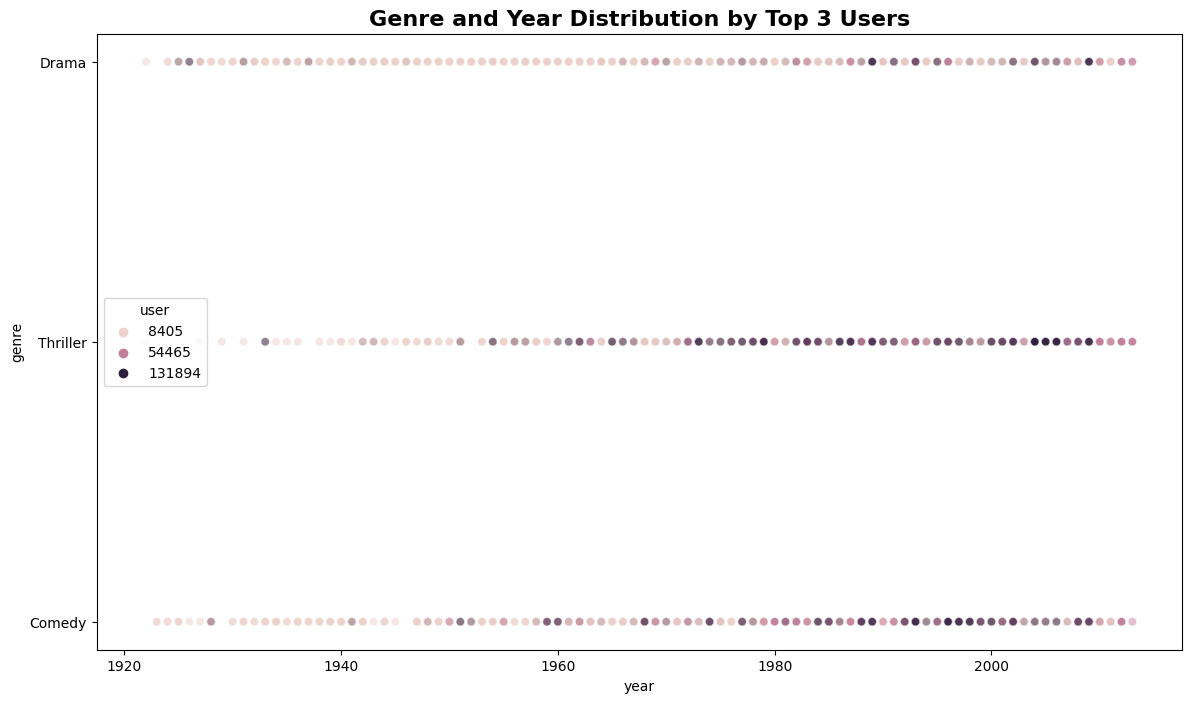

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
sns.scatterplot(top_users_genre_year_df, y='genre', x='year', alpha=0.5, hue='user')
plt.title('Genre and Year Distribution by Top 3 Users', 
          fontdict= {'fontsize': 16,
                     'fontweight': 'bold'})
plt.show()